# Watering detection
This notebook serves as a playground for tuning parameters of the watering detection algorithm based on detecting increases in the soil moisture measurements.

In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

Let's define some dummy, albeit plausible, moisture measurements.

In [80]:
measurements = [33,32,34,35,34,32,33,30,30,29,31,30,33,36,33,32,31,30,29,31,33,32,27,30,31,32,30,29,30,31,29,28,29,28,27,26,27,27,26,25,24,28,23,22,21,21,19,20,19,20,20,25,19,19,18,17,17,16,15,15,15,17,15,14,15,14,15,14,13,16,18,19,20,24,22,24,28,27,28,30,33,35,35,34,35,33,35,34,33,33,34,36,32,31,33,30,29,30,32,33,29,32,31,30,29,30,31,28,30]

Now, let's see how tinkering with parameters can change the detector output.

In [81]:
@interact(beta=FloatSlider(min=0.,max=1.,step=0.01, value=0.85), window_width=IntSlider(min=1,max=len(measurements), step=1, value=15), increase_threshold=IntSlider(min=1,max=max(measurements)-min(measurements), step=1, value=5))
def show_plot(beta, window_width, increase_threshold):
    ema_measurements = [measurements[0]]
    for i in range(1, len(measurements)):
        ema_measurements.append(beta*ema_measurements[-1] + (1-beta)*measurements[i])
    water_idx = -1
    for i in range(window_width,len(ema_measurements)):
        if ema_measurements[i]-ema_measurements[i-window_width]>increase_threshold:
            water_idx = i
            break
    plt.plot(measurements)
    plt.plot(ema_measurements)
    if water_idx>0:
        plt.axvline(x=water_idx, c='red')
        plt.text(water_idx-5.5, max(measurements)+(max(measurements)-min(measurements))/10, 'Watering', color='red')
        plt.axvline(x=water_idx-window_width, c='red', ls='--', alpha=0.3)

interactive(children=(FloatSlider(value=0.85, description='beta', max=1.0, step=0.01), IntSlider(value=15, des…

## Findings

### 1. Overreacting
Most imporant factors that could lead to overreacting (false watering detection) are:
* too low beta
* too low increase threshold

Low beta leads to detector being more sensitive to local fluctuations, while low increase threshold makes the detector react to insignificant changes, possibly being noise.

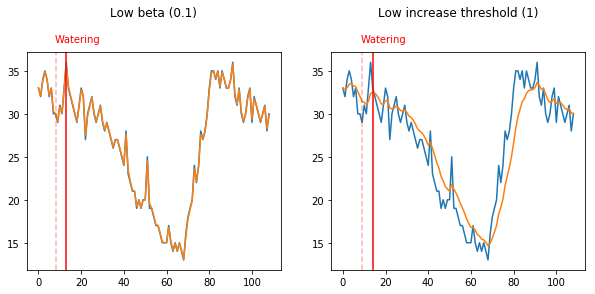

In [107]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Low beta (0.1)\n\n")
show_plot(0.1, 5, 5)
plt.subplot(122)
plt.title("Low increase threshold (1)\n\n")
show_plot(0.80, 5, 1)
plt.show()

## 2. Underreacting
Underracting is indicated by false negatives - the system fails to detect a watering when it occurs. For instance, if the increase in moisture is gradual over long period of time, the system might not detect the change at all.
The factors contributing to underracting are:
* too high beta
* too narrow window
* too high increase threshold

High beta values smooth the plot too much, in the extreme example they can even make the plot constant. Too narrow window will make the detector incapable of detecting significant increased spread over very long periods of time. When the increase threshold is too high, it might be possible that such an increase will never happen with an ordinary watering as there is simply not enough water needed by the plant.

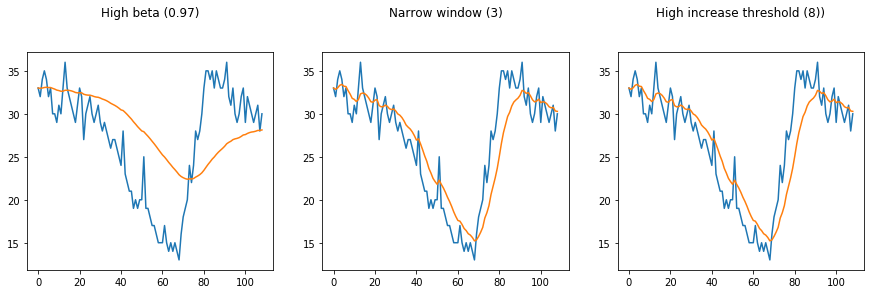

In [103]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title("High beta (0.97)\n\n")
show_plot(0.97, 15, 5)
plt.subplot(132)
plt.title("Narrow window (3)\n\n")
show_plot(0.85, 3, 5)
plt.subplot(133)
plt.title("High increase threshold (8)\n\n")
show_plot(0.85, 5, 8)
plt.show()